<a href="https://colab.research.google.com/github/arfandiTelU/Skripsi/blob/master/Cnn_Klasifikasi_Bibit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Menghubungkan Dengan Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Install Library

In [0]:
!pip install -q keras
!pip install opencv-contrib-python

Import Library

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from matplotlib import pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Mengambil, Memproses, Dan Membagi Data

In [3]:
train_dir = '/content/gdrive/My Drive/Dataset/Train'
test_dir = '/content/gdrive/My Drive/Dataset/Test'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.12)
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=.12)
test_datagen = ImageDataGenerator(rescale=1./255)

IMAGE_SHAPE = (224,224)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset = "training",
    shuffle = True,
    target_size = IMAGE_SHAPE,
    batch_size = 20
)

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    subset = "validation",
    shuffle = True,
    target_size = IMAGE_SHAPE,
    batch_size = 20
)

Found 510 images belonging to 5 classes.
Found 65 images belonging to 5 classes.


In [4]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Cabai' 'Pakcoy' 'Sawi' 'Terong' 'Tomat']


Membangun Arsitektur Model

In [5]:
# print(train_generator.num_classes)
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Flatten())

# model.add(layers.Dense(256, activation = 'relu'))

# model.add(layers.Dropout(0.4))

# model.add(layers.Dense(5, activation = 'softmax'))

model = models.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  layers.Dropout(0.4),
  layers.Dense(5, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(
  # optimizer=optimizers.RMSprop(lr=1e-4),
  optimizer=optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch = 26, 
    epochs = 20,
    validation_data=valid_generator,
    validation_steps = 4)

# history = model.fit(
#     train_generator, 
#     epochs = 20,
#     steps_per_epoch = 26,
#     validation_data=valid_generator,
#     validation_steps = 4)

Epoch 1/20
26/26 [==============================] - 216s 8s/step - loss: 1.7942 - acc: 0.2784 - val_loss: 1.1620 - val_acc: 0.5385
Epoch 2/20
26/26 [==============================] - 17s 646ms/step - loss: 1.2222 - acc: 0.5059 - val_loss: 0.9199 - val_acc: 0.6462
Epoch 3/20
26/26 [==============================] - 17s 643ms/step - loss: 0.9508 - acc: 0.6353 - val_loss: 0.7096 - val_acc: 0.7231
Epoch 4/20
26/26 [==============================] - 16s 632ms/step - loss: 0.6886 - acc: 0.7392 - val_loss: 0.6706 - val_acc: 0.8154
Epoch 5/20
26/26 [==============================] - 17s 647ms/step - loss: 0.6081 - acc: 0.7451 - val_loss: 0.5697 - val_acc: 0.8000
Epoch 6/20
26/26 [==============================] - 17s 645ms/step - loss: 0.5546 - acc: 0.8039 - val_loss: 0.5411 - val_acc: 0.8462
Epoch 7/20
26/26 [==============================] - 17s 652ms/step - loss: 0.5014 - acc: 0.8157 - val_loss: 0.4800 - val_acc: 0.8308
Epoch 8/20
26/26 [==============================] - 16s 626ms/step - lo

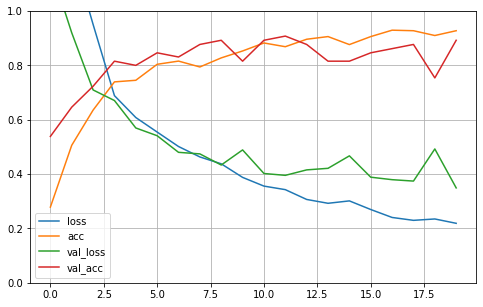

In [8]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
FLOWERS_SAVED_MODEL = "saved_models/flowers"
MODEL_PATH = "/content/gdrive/My Drive/Models/model.h5"
model.save(MODEL_PATH)
# tf.keras.experimental.export_saved_model(model, MODEL_PATH)

In [20]:
loaded_model = model
loaded_model.load_weights(MODEL_PATH, by_name=True)
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SHAPE,
    batch_size = 65
)

evaluate = loaded_model.evaluate(test_generator, steps = 1)

Found 65 images belonging to 5 classes.
1/1 [==============================] - 0s 1ms/step - loss: 0.5021 - acc: 0.8615


In [26]:
test_image_batch, test_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(test_label_batch, axis=-1)
predict = loaded_model.predict(test_image_batch)
pred_dataframe = pd.DataFrame(predict)
pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
pred_dataframe

Prediction results for the first elements


,Cabai,Pakcoy,Sawi,Terong,Tomat
0,0.000300,0.876011,0.123108,0.000017,0.000565
1,0.039722,0.014627,0.033714,0.072929,0.839007
2,0.002435,0.977658,0.016974,0.002291,0.000642
3,0.007561,0.009335,0.000917,0.706834,0.275354
4,0.009221,0.033021,0.932204,0.021209,0.004345
...,...,...,...,...,...
60,0.005588,0.544089,0.324715,0.125299,0.000309
61,0.664759,0.067236,0.122817,0.051800,0.093388
62,0.004992,0.000763,0.000134,0.985201,0.008910
63,0.000190,0.005428,0.988242,0.005246,0.000895


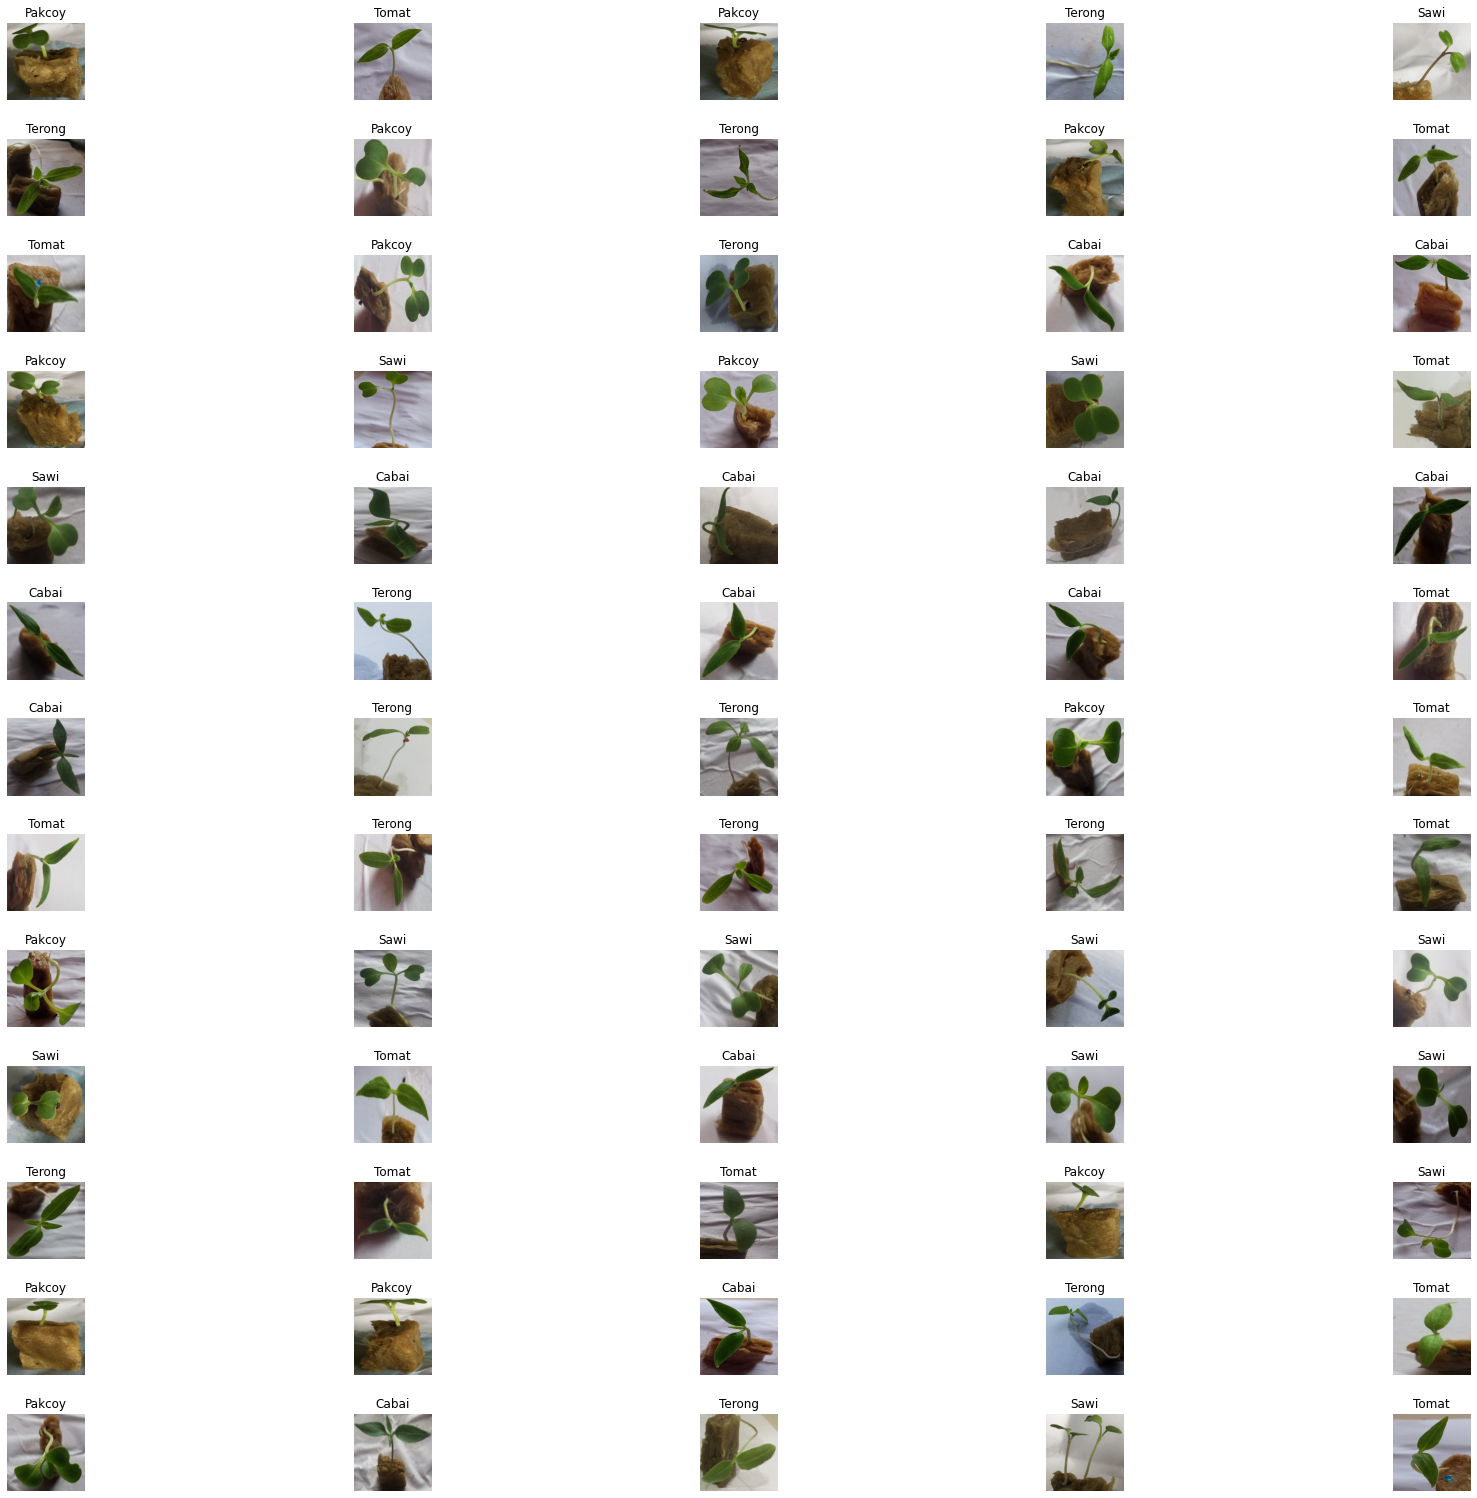

In [27]:
true_labels = dataset_labels[true_label_ids]
plt.figure(figsize=(30,27))
plt.subplots_adjust(hspace=0.5)
for n in range(true_label_ids.size):
  plt.subplot(13,5,n+1)
  plt.imshow(test_image_batch[n])
  plt.title(true_labels[n].title())
  plt.axis('off')
# _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

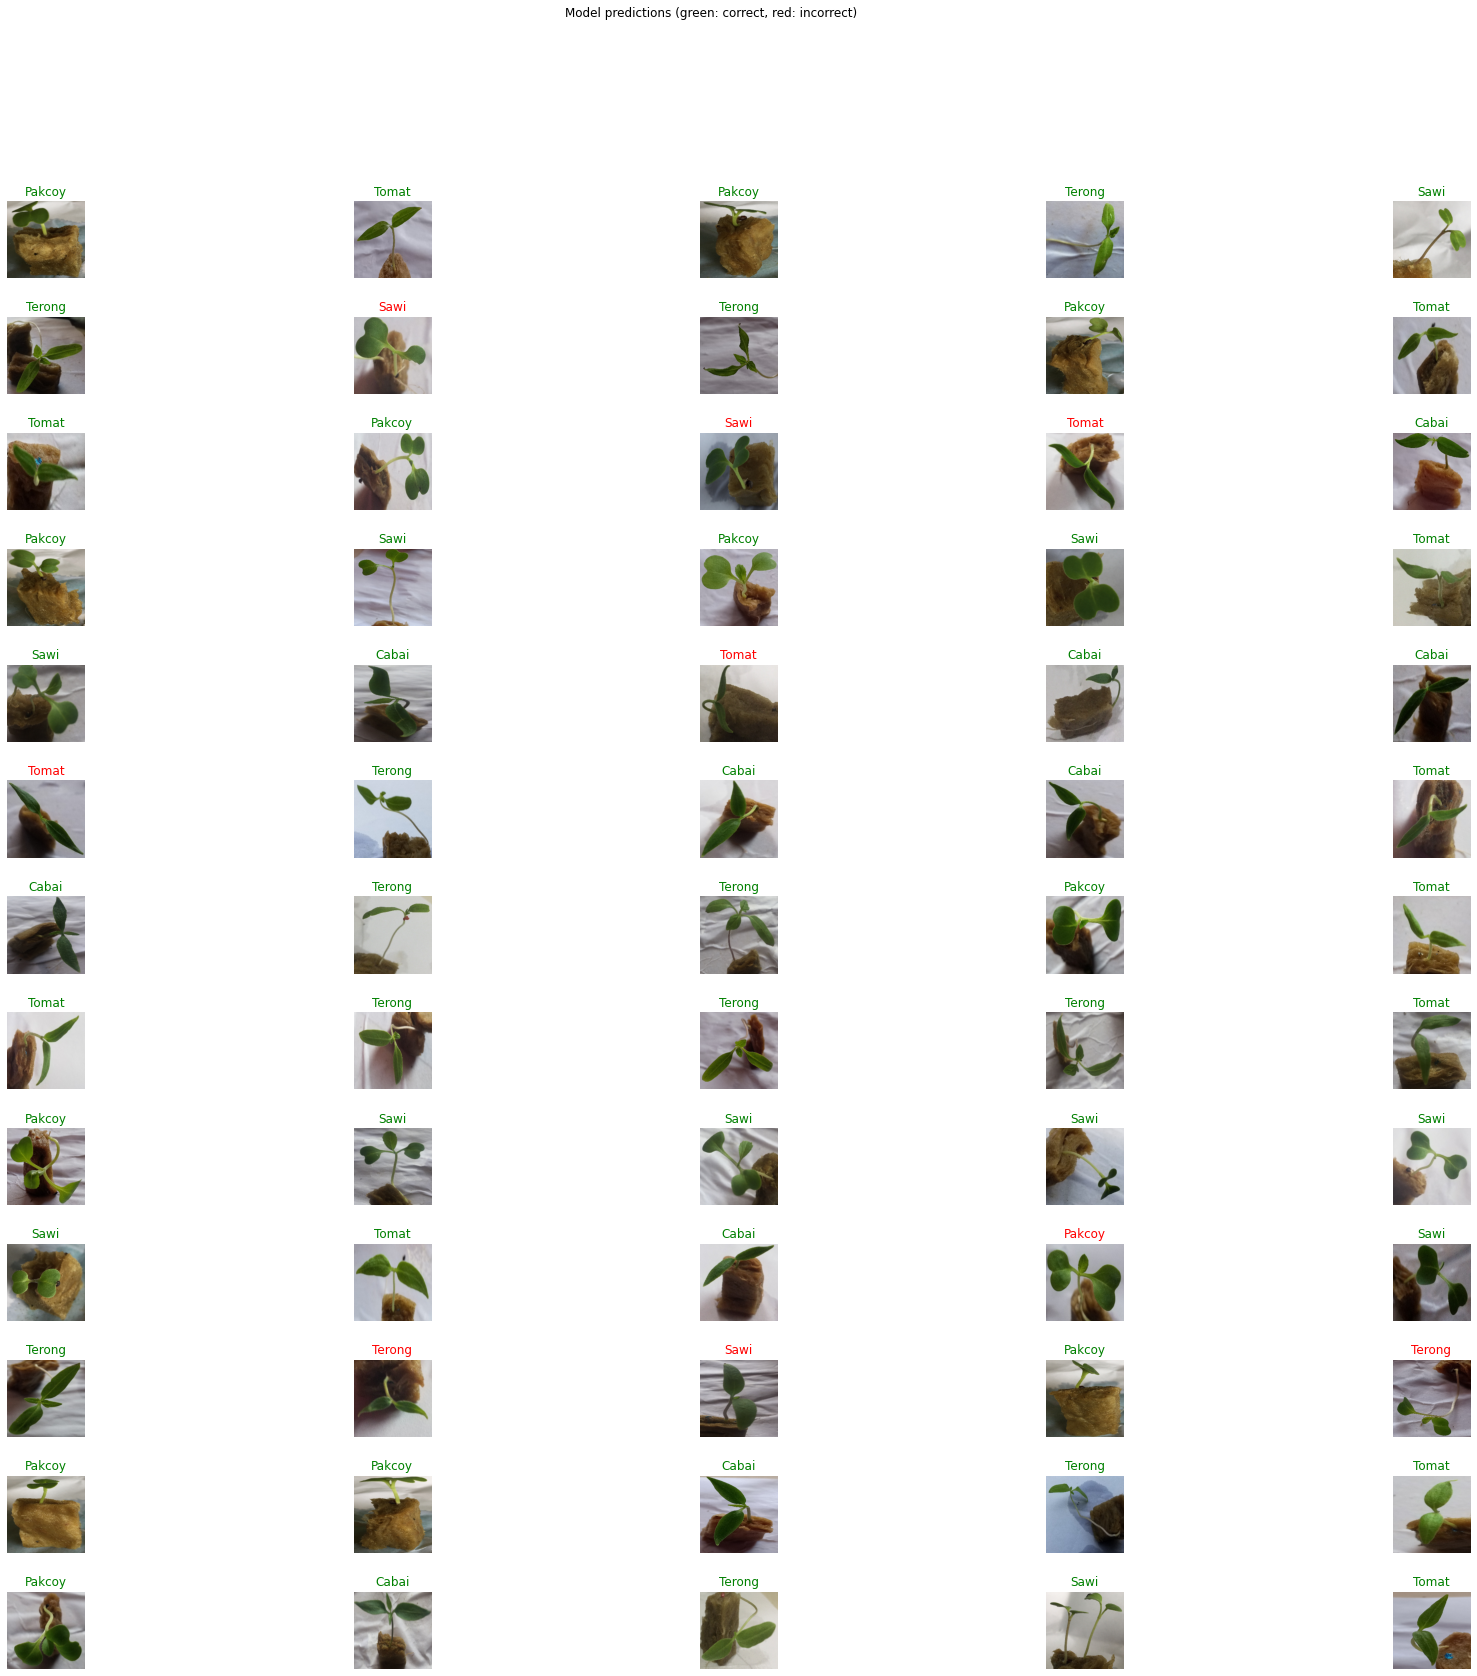

In [28]:
predicted_ids = np.argmax(predict, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(30,27))
plt.subplots_adjust(hspace=0.5)
for n in range(true_label_ids.size):
  plt.subplot(13,5,n+1)
  plt.imshow(test_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")